**Author: Fitria Dwi Wulandari (fitria.dwi71@ui.ac.id) - January 7, 2020**

**Disclaimer.**
<br> This notebook was made as a final exam report for a data mining class that I worked on with Allissa and Nurlia.

# AIRLINE PASSENGER SATISFACTION

Data yang digunakan merupakan data survei kepuasan penumpang dari salah satu maskapai penerbangan di U.S.
<br> Sumber data : [https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction](https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction)

### **File Loading**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Import Dataset
airline = pd.read_csv('train.csv')

In [3]:
# Melihat Bentuk Data
print('Ukuran Data', airline.shape)
airline.head()

Ukuran Data (103904, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


**Keterangan:**

* `id` : Unique id number to each passenger

* `Gender` : Gender of the passengers

* `Customer Type` : The customer type

* `Age` : The actual age of the passengers

* `Type of Travel` : Purpose of the flight of the passengers

* `Class` : Travel class in the plane of the passengers

* `Flight distance` : The flight distance of this journey

* `Inflight wifi service` : Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

* `Departure/Arrival time convenient` : Satisfaction level of Departure/Arrival time convenient

* `Ease of Online booking` : Satisfaction level of online booking

* `Gate location` : Satisfaction level of gate location

* `Food and drink` : Satisfaction level of food and drink

* `Online boarding` : Satisfaction level of online boarding

* `Seat comfort` : Satisfaction level of seat comfort

* `Inflight entertainment` : Satisfaction level of inflight entertainment

* `On-board service` : Satisfaction level of on-board service

* `Leg room service` : Satisfaction level of leg room service

* `Baggage handling` : Satisfaction level of baggage handling

* `Check-in service` : Satisfaction level of check-in service

* `Inflight service` : Satisfaction level of inflight service

* `Cleanliness` : Satisfaction level of cleanliness

* `Departure Delay in Minutes` : Minutes delayed when departure

* `Arrival Delay in Minutes` : Minutes delayed when Arrival

* `Satisfaction` : Airline satisfaction level (Neutral/Dissatisfaction, Satisfaction)

### Exploratory Data Analysis (EDA)

#### ***Data Preprocessing***

##### - **Menghapus Kolom yang Tidak Diperlukan**

In [4]:
# Menghapus Kolom 'Unnamed: 0' dan 'id'
airline = airline.drop(['Unnamed: 0', 'id'], axis = 1)
airline.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


##### - **Mengoreksi Tipe Variabel**

In [5]:
print('Tipe Variabel Sebelum Dikoreksi, adalah:')
airline.info()

Tipe Variabel Sebelum Dikoreksi, adalah:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11

In [6]:
# Mengoreksi Tipe Variabel
airline[["Gender","Customer Type","Type of Travel","Class","satisfaction"]] = airline[["Gender","Customer Type","Type of Travel","Class","satisfaction"]].apply(lambda x: x.astype('category'))

In [7]:
print('Tipe Variabel Setelah Dikoreksi, adalah:')
airline.info()

Tipe Variabel Setelah Dikoreksi, adalah:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null 

##### - **Mengecek Duplikasi Data**

In [8]:
print('Total Duplikasi pada Data:', airline.duplicated().sum())

Total Duplikasi pada Data: 0


##### - **Memeriksa *Missing Value***

In [9]:
print('\nJumlah Missing Values pada masing-masing Kolom, adalah:')
airline.isnull().sum().sort_values(ascending=False)


Jumlah Missing Values pada masing-masing Kolom, adalah:


Arrival Delay in Minutes             310
satisfaction                           0
Food and drink                         0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Gender                                 0
dtype: int64

In [10]:
# Mengisi Missing Value dengan Median
airline['Arrival Delay in Minutes'] = airline['Arrival Delay in Minutes'].fillna(airline['Arrival Delay in Minutes'].median())

# Checking again
np.isnan(airline['Arrival Delay in Minutes']).value_counts()

False    103904
Name: Arrival Delay in Minutes, dtype: int64

In [11]:
print('\nJumlah Missing Values Setelah Di-imputasi, adalah:')
airline.isnull().sum().sort_values(ascending=False)


Jumlah Missing Values Setelah Di-imputasi, adalah:


satisfaction                         0
Food and drink                       0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Online boarding                      0
Arrival Delay in Minutes             0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Gender                               0
dtype: int64

#### ***Data Visualization***

##### - **Variabel Kategorik dengan Variabel Target (*Customer Satisfaction*)**

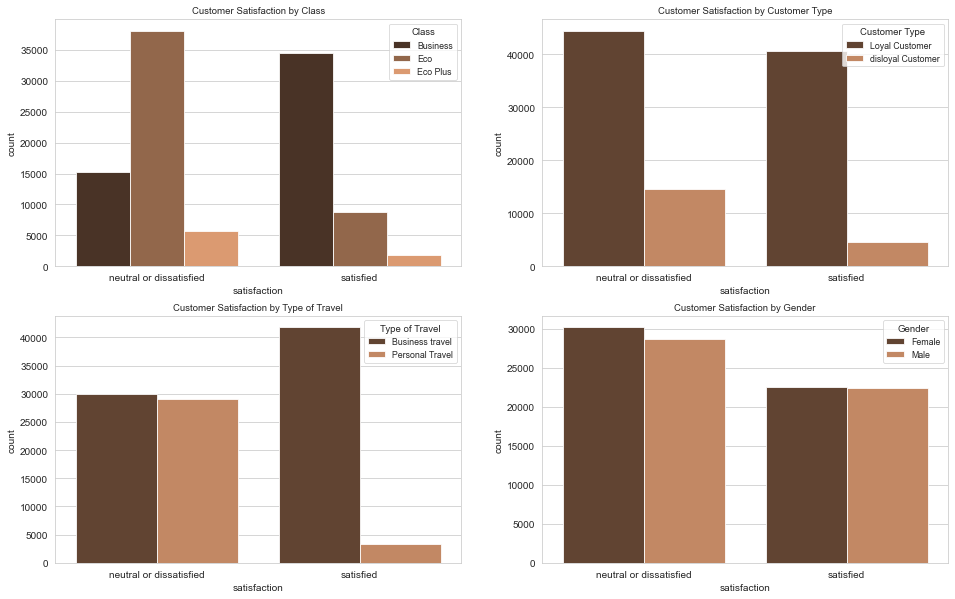

In [12]:
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(16,10))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Customer Satisfaction by Class')
sns.countplot(x='satisfaction', data = airline, hue = 'Class', palette = 'copper', ax=ax[0][0])

ax[0][1].set_title('Customer Satisfaction by Customer Type')
sns.countplot(x='satisfaction', data = airline, hue = 'Customer Type', palette = 'copper', ax=ax[0][1])

ax[1][0].set_title('Customer Satisfaction by Type of Travel')
sns.countplot(x='satisfaction', data = airline, hue = 'Type of Travel', palette = 'copper', ax=ax[1][0])

ax[1][1].set_title('Customer Satisfaction by Gender')
sns.countplot(x='satisfaction', data = airline, hue = 'Gender', palette = 'copper', ax=ax[1][1])

##### - **Variabel Berskala Likert**

In [13]:
def bar_plot(variable):
    
    var=airline[variable]
    var_Value=var.value_counts()
    
    # Visualize
    plt.figure(figsize=(12,6))
    plt.bar(var_Value.index,var_Value.values, color='darksalmon')
    
    plt.xlabel("Score")
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,var_Value))

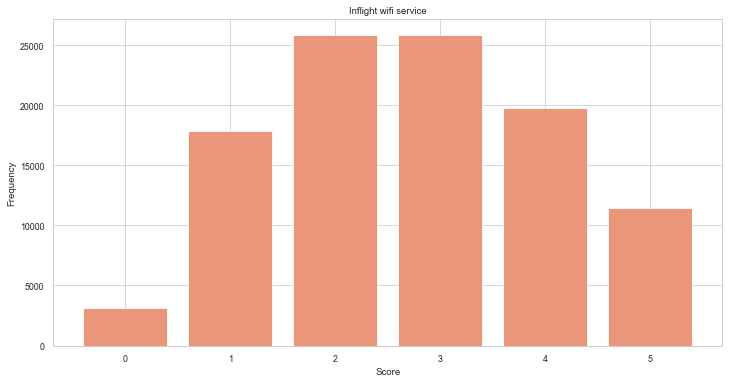

Inflight wifi service: 
 3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64


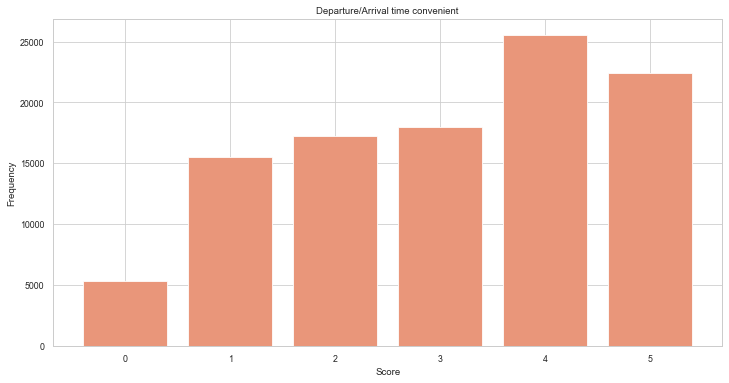

Departure/Arrival time convenient: 
 4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64


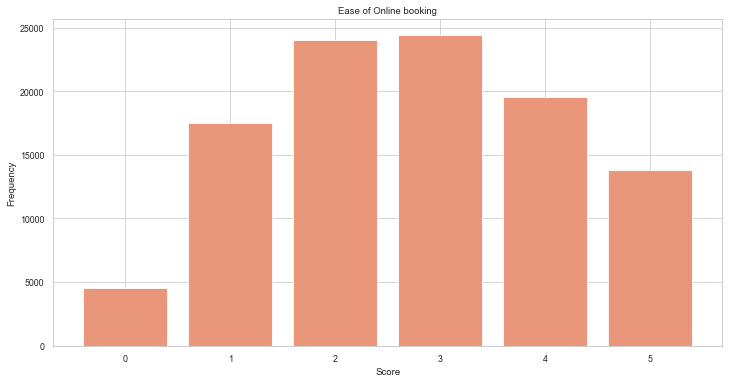

Ease of Online booking: 
 3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64


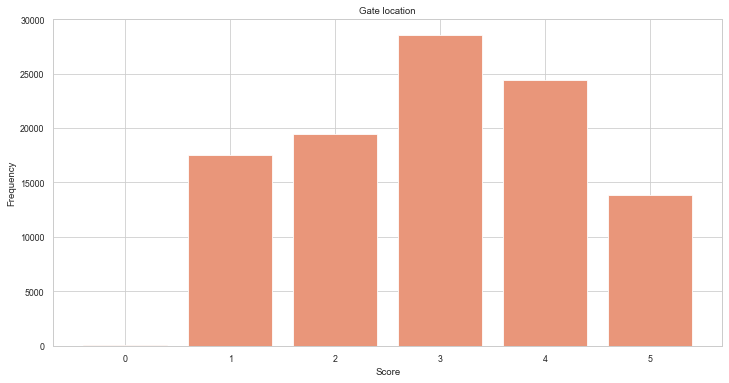

Gate location: 
 3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64


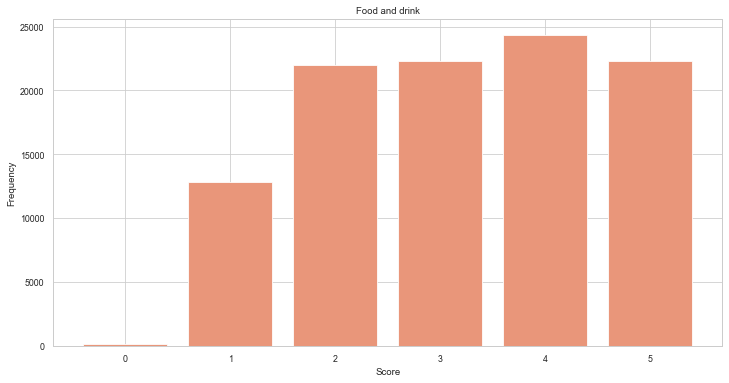

Food and drink: 
 4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64


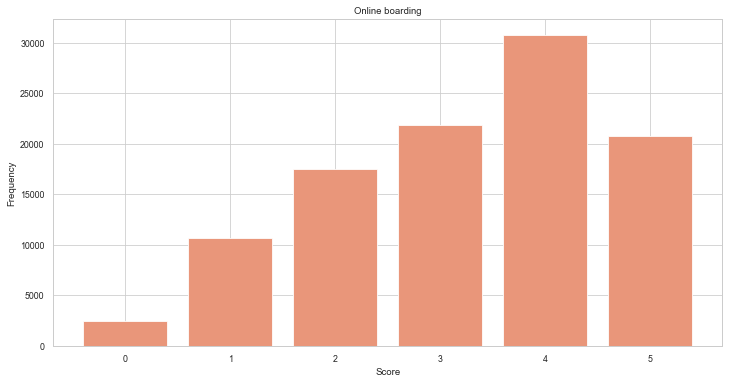

Online boarding: 
 4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64


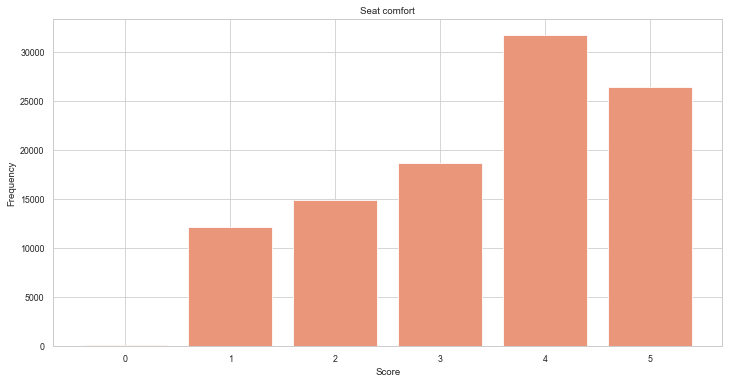

Seat comfort: 
 4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64


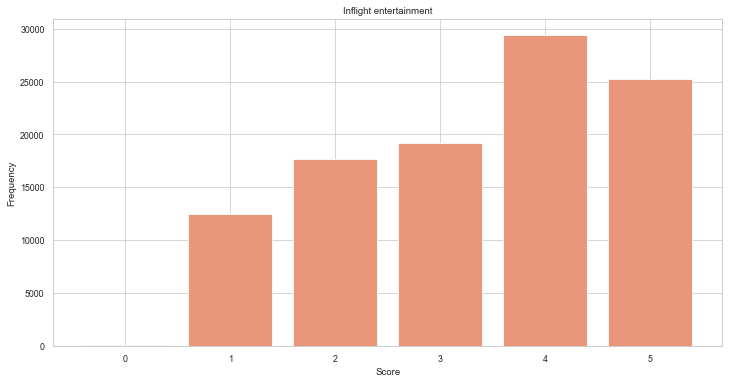

Inflight entertainment: 
 4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64


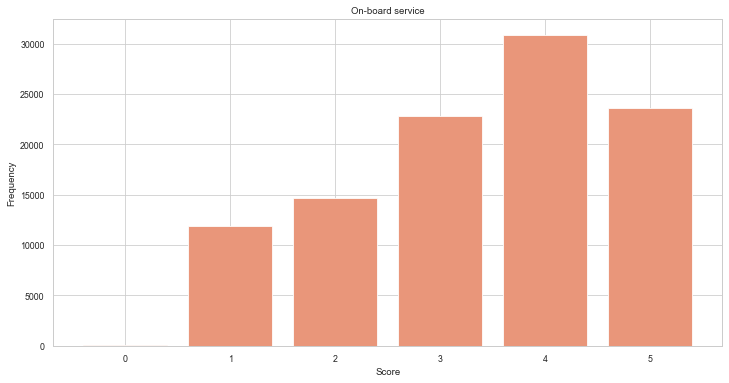

On-board service: 
 4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64


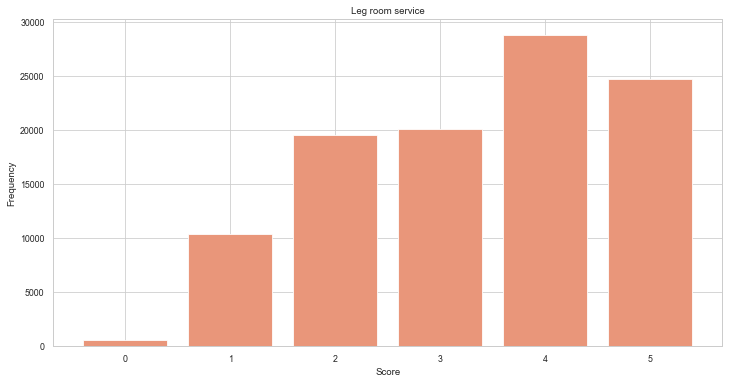

Leg room service: 
 4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64


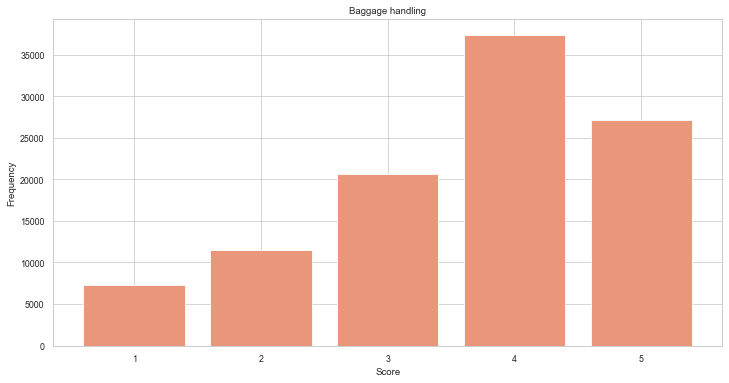

Baggage handling: 
 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64


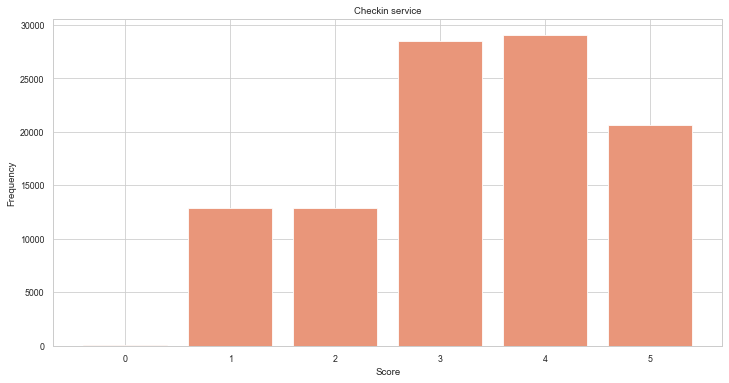

Checkin service: 
 4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64


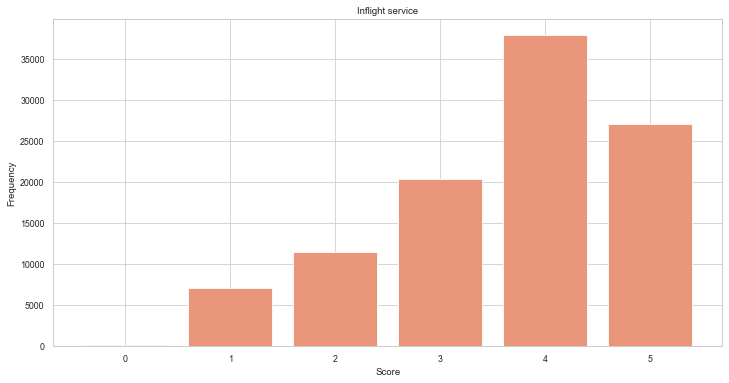

Inflight service: 
 4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64


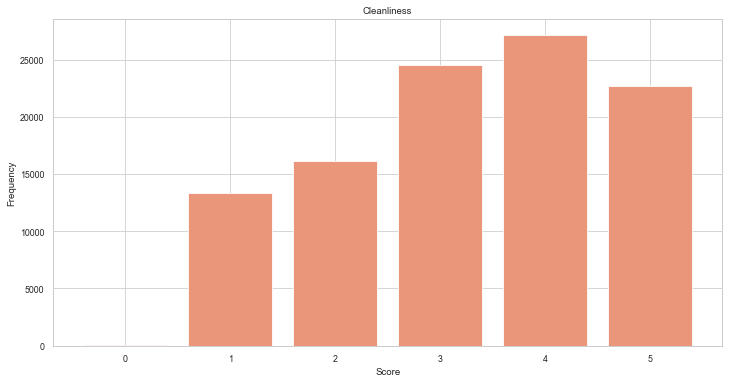

Cleanliness: 
 4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64


In [14]:
likert = ["Inflight wifi service", "Departure/Arrival time convenient", 	
               "Ease of Online booking", 	"Gate location", 	"Food and drink", "Online boarding",
               "Seat comfort","Inflight entertainment","On-board service",
               "Leg room service","Baggage handling","Checkin service",
               "Inflight service","Cleanliness",]
for c in likert:
    bar_plot(c)

In [15]:
airline_likert = airline.copy()

In [16]:
likert2 = { 'Inflight wifi service' : [airline_likert['Inflight wifi service'].mean()],
'Departure/Arrival time convenient' : [airline_likert['Departure/Arrival time convenient'].mean()],
'Ease of Online booking' : [airline_likert['Ease of Online booking'].mean()],''
'Gate location' : [airline_likert['Gate location'].mean()],
'Food and drink' : [airline_likert['Food and drink'].mean()],
'Online boarding' : [airline_likert['Online boarding'].mean()],
'Seat comfort' : [airline_likert['Seat comfort'].mean()],
'Inflight entertainment' : [airline_likert['Inflight entertainment'].mean()],
'On-board service' : [airline_likert['On-board service'].mean()],
'Leg room service' : [airline_likert['Leg room service'].mean()],
'Baggage handling' : [airline_likert['Baggage handling'].mean()],
'Checkin service' : [airline_likert['Checkin service'].mean()],
'Inflight service' : [airline_likert['Inflight service'].mean()],
'Cleanliness' : [airline_likert['Cleanliness'].mean()]}

df_likert = pd.DataFrame(likert2).stack()
df_likert = df_likert.sort_values(ascending=False)
df_likert

0  Inflight service                     3.640428
   Baggage handling                     3.631833
   Seat comfort                         3.439396
   On-board service                     3.382363
   Inflight entertainment               3.358158
   Leg room service                     3.351055
   Checkin service                      3.304290
   Cleanliness                          3.286351
   Online boarding                      3.250375
   Food and drink                       3.202129
   Departure/Arrival time convenient    3.060296
   Gate location                        2.976883
   Ease of Online booking               2.756901
   Inflight wifi service                2.729683
dtype: float64

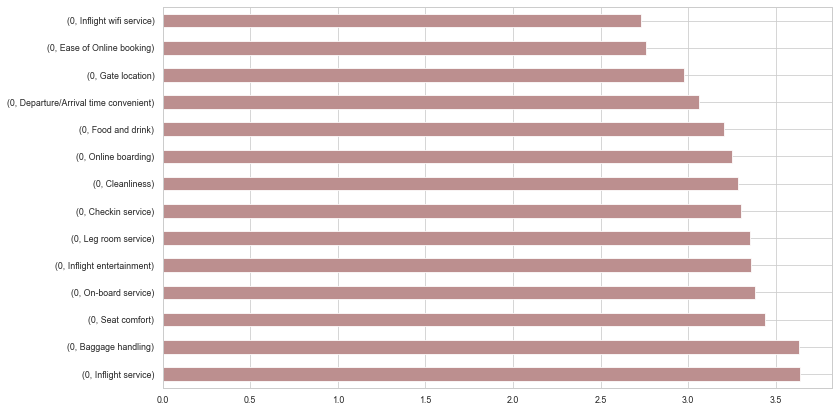

In [17]:
df_likert.plot(kind="barh",color='rosybrown',figsize=(12,7))

##### - **Distribusi Variabel Numerik**

In [18]:
def plot_hist(variable):
    plt.figure(figsize=(12,6))
    plt.hist(airline[variable],bins=50,color='darkcyan')
    plt.xlabel(variable)
    plt.ylabel("Fruequency")
    plt.title("{} distribution with histogram".format(variable))
    plt.show()

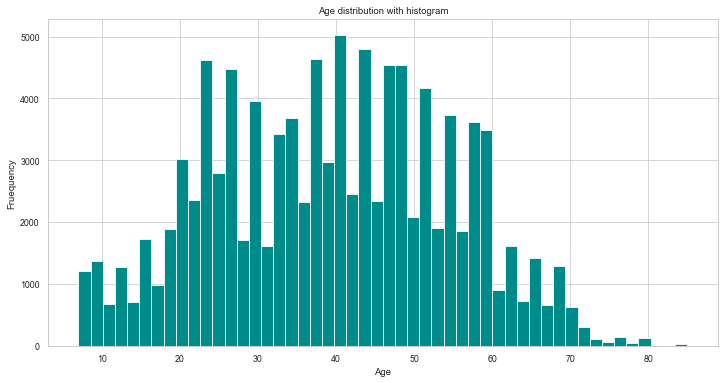

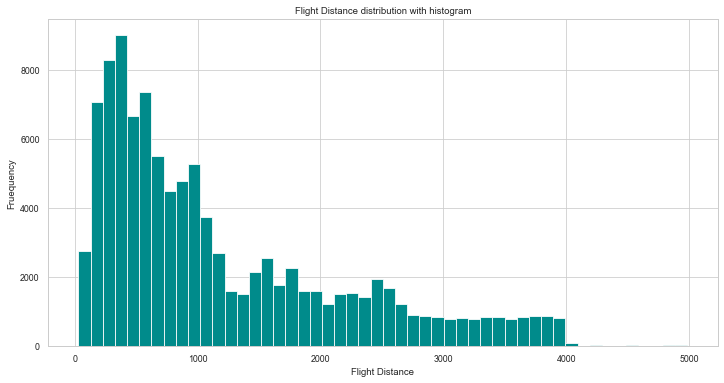

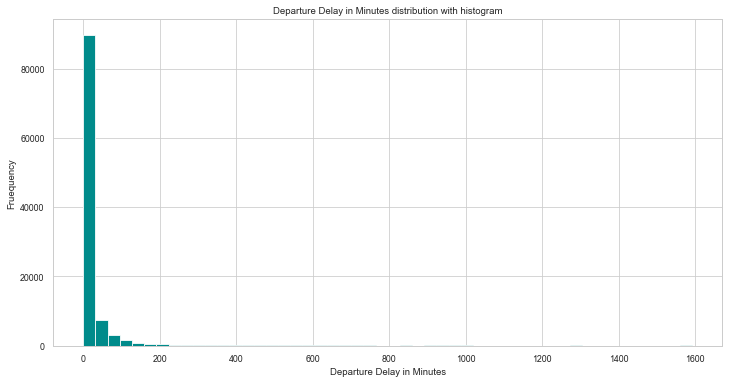

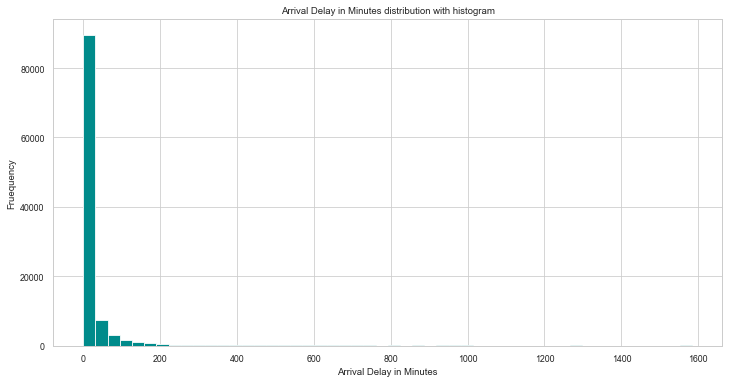

In [19]:
numerik=["Age", "Flight Distance", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
for n in numerik:
    plot_hist(n)

##### - ***Class Proportion Detection***

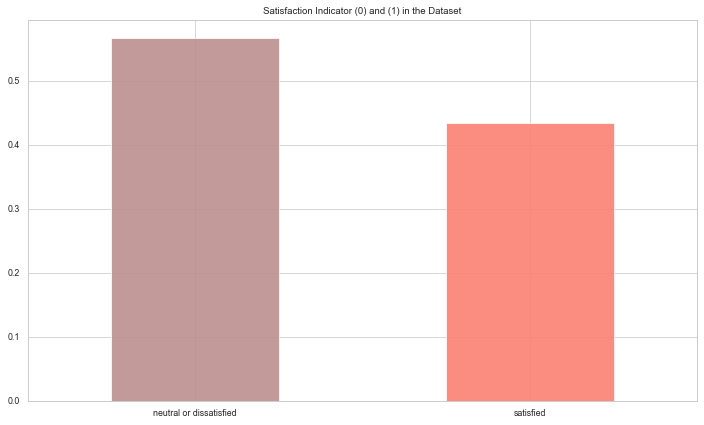

In [20]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (12,7))
airline.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['rosybrown','salmon'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

Berdasarkan hasil barplot di atas, tidak terlihat adanya ketidakseimbangan yang signifikan (selisih signifikan) antara kelas `satisfied` dengan `neutral/dissatisfied`. Oleh karena itu, tidak perlu dilakukan penanganan proporsi kelas agar seimbang.

### ***Outliers Detection***

####  **Mendeteksi *Outlier* dengan BoxPlot**

In [21]:
# Membuat Dataset tanpa Variabel Kategorik
numerical_features = airline.select_dtypes(exclude=['category']).copy()
numerical_features

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


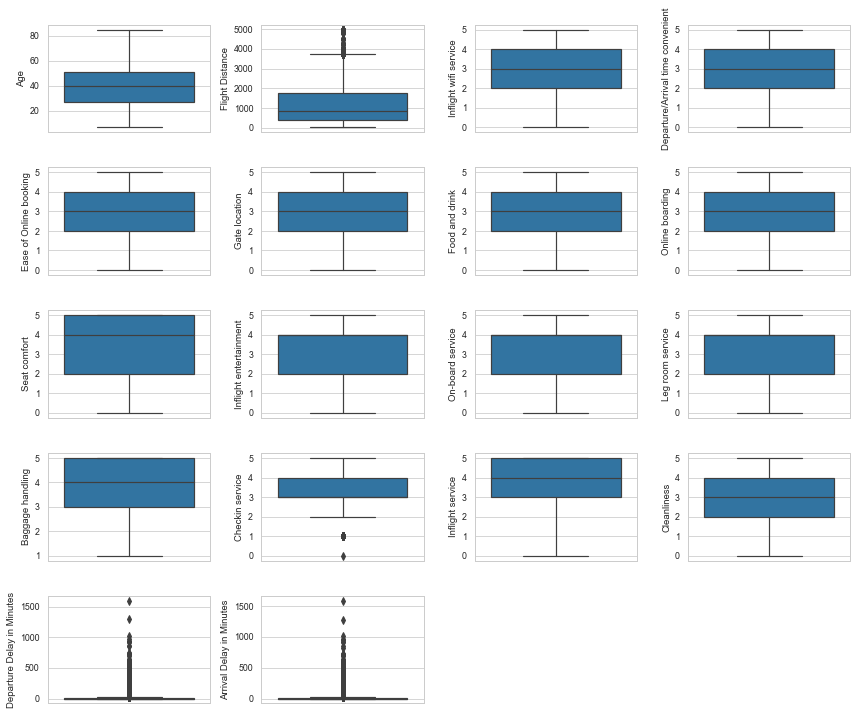

In [22]:
# Visualisasi Sebelum Outlier Ditangani
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,18))

for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

Dari boxplot tersebut, diperoleh informasi bahwa ditemukan outliers pada variabel berikut :
- `Flight Distance`
- `Checkin service`
- `Departure Delay in Minutes`
- `Arrival Delay in Minutes`

sehingga perlu dilakukan penanganan outliers.

#### **Mengatasi *Oulier***

In [23]:
Q1 = (airline[['Flight Distance','Checkin service', 'Departure Delay in Minutes','Arrival Delay in Minutes']]).quantile(0.25)
Q3 = (airline[['Flight Distance','Checkin service', 'Departure Delay in Minutes','Arrival Delay in Minutes']]).quantile(0.75)
IQR = Q3-Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

airline['Flight Distance'].mask(airline['Flight Distance']>max['Flight Distance'],max['Flight Distance'],inplace=True)
airline['Checkin service'].mask(airline['Checkin service']<min['Checkin service'],min['Checkin service'],inplace=True)
airline['Departure Delay in Minutes'].mask(airline['Departure Delay in Minutes']>max['Departure Delay in Minutes'],max['Departure Delay in Minutes'],inplace=True)
airline['Arrival Delay in Minutes'].mask(airline['Arrival Delay in Minutes']>max['Arrival Delay in Minutes'],max['Arrival Delay in Minutes'],inplace=True)

In [24]:
numerical_features = airline.select_dtypes(exclude=['category']).copy()
numerical_features

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,13,460.0,3,4,3,1,5,3,5,5,4,3,4,4.0,5,5,25,18.0
1,25,235.0,3,2,3,3,1,3,1,1,1,5,3,1.5,4,1,1,6.0
2,26,1142.0,2,2,2,2,5,5,5,5,4,3,4,4.0,4,5,0,0.0
3,25,562.0,2,5,5,5,2,2,2,2,2,5,3,1.5,4,2,11,9.0
4,61,214.0,3,3,3,3,4,5,5,3,3,4,4,3.0,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192.0,2,1,2,3,2,2,2,2,3,1,4,2.0,3,2,3,0.0
103900,49,2347.0,4,4,4,4,2,4,5,5,5,5,5,5.0,5,4,0,0.0
103901,30,1995.0,1,1,1,3,4,1,5,4,3,2,4,5.0,5,4,7,14.0
103902,22,1000.0,1,1,1,5,1,1,1,1,4,5,1,5.0,4,1,0,0.0


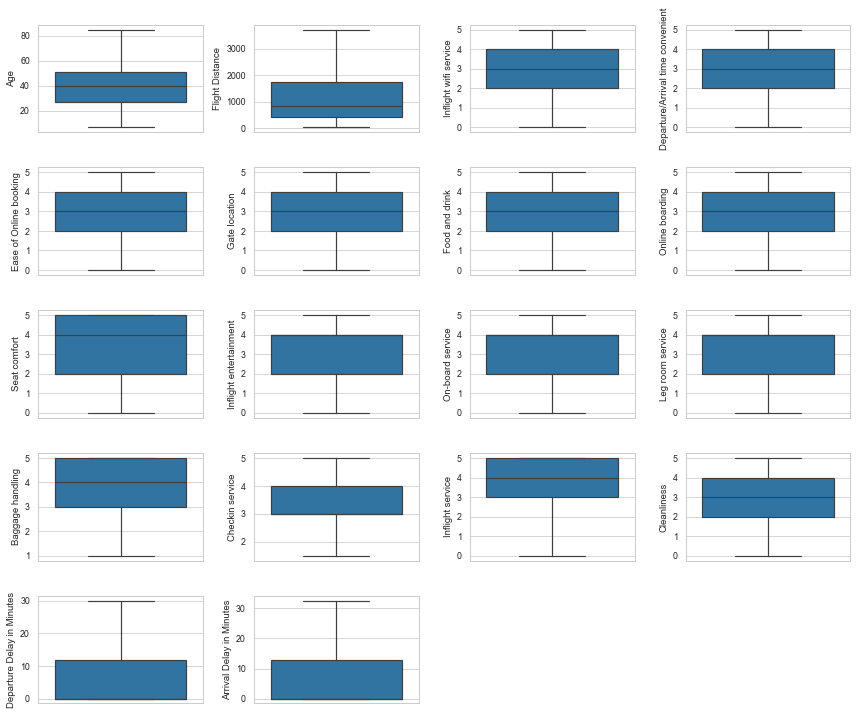

In [25]:
# Visualisasi Setelah Outlier Ditangani
fig = plt.figure(figsize=(12,18))

for i in range(len(numerical_features.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

### ***Building a Model***

#### **Encoding Data**

In [26]:
from sklearn.preprocessing import LabelEncoder
# Convert Semua Variabel Non-Numerik menjadi Variabel Bertipe Numerik
for column in airline.columns:
    if airline[column].dtype == np.number: continue
    # Perform Encoding untuk Setiap Variabel Non-Numerik
    airline[column] = LabelEncoder().fit_transform(airline[column])

In [27]:
print('\nDataset Setelah Encoding, adalah:')
airline.describe()


Dataset Setelah Encoding, adalah:


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,32.379052,0.310373,0.594135,1186.133927,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,2.631833,3.366333,3.640428,3.286351,7.396299,7.909493,0.433333
std,0.499947,0.386404,15.113075,0.462649,0.620799,988.126724,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.158642,1.175663,1.312273,11.223866,11.965566,0.495538
min,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,20.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,44.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,74.000000,1.000000,2.000000,3736.500000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,30.000000,32.500000,1.000000


In [28]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int32  
 1   Customer Type                      103904 non-null  int32  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int32  
 4   Class                              103904 non-null  int32  
 5   Flight Distance                    103904 non-null  float64
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

#### **Splitting Data**
Membagi data set menjadi dua bagian yaitu 80% training dan 20% testing.

In [29]:
# Mendefinisikan Variabel Independen (x) dan Variabel Dependen (y)
x = airline.drop('satisfaction', axis=1)
y = airline['satisfaction']

In [30]:
# Membagi Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(83123, 22) (20781, 22)


#### **Model Building**

Berikut adalah beberapa model yang akan kami coba untuk kemudian menentukan model terbaik:
* Regresi Logistik
* Gaussian Naive Bayes
* KNN Classifier
* Decision Tree
* Random Forest

##### 1. ***Logistic Regression***

###### - ***Train the Model***

In [81]:
from sklearn.linear_model import LogisticRegression

# Train the Model
log_model = LogisticRegression().fit(X_train, y_train)
print(log_model)

LogisticRegression()


C:\Users\Fitria D. Wulandari\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###### - ***Predicting Data Train and Test***

In [82]:
from sklearn.metrics import confusion_matrix, classification_report

In [83]:
# Predict Data Train
y_train_pred_log = log_model.predict(X_train)

# Print Classification Report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train, y_train_pred_log))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     47166
           1       0.76      0.81      0.78     35957

    accuracy                           0.81     83123
   macro avg       0.80      0.81      0.81     83123
weighted avg       0.81      0.81      0.81     83123



In [84]:
# Predict Data Test
y_test_pred_log = log_model.predict(X_test)

# Print Classification Report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred_log))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     11713
           1       0.77      0.81      0.79      9068

    accuracy                           0.81     20781
   macro avg       0.81      0.81      0.81     20781
weighted avg       0.81      0.81      0.81     20781



In [85]:
roc_auc_log = roc_auc_score(y_test, y_test_pred_log)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.8101757541443607


###### - ***Confusion Matrix***

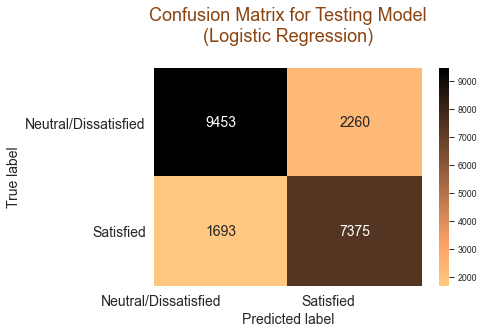

In [35]:
# Form Confusion Matrix as a DataFrame
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# Plot Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size': 14}, fmt='d', cmap='copper_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='saddlebrown')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### 2. **Gaussian Naive Bayes**

###### - ***Train the Model***

In [86]:
from sklearn.naive_bayes import GaussianNB

# Train the Model
gnb_model = GaussianNB().fit(X_train,y_train)
print(gnb_model)

GaussianNB()


###### - ***Predict Data Train and Data Test***

In [87]:
# Predict Data Train
y_train_pred_gnb = gnb_model.predict(X_train)

# Print Classification Report
print('Classification Report Training Model (Gaussian Naive Bayes):')
print(classification_report(y_train, y_train_pred_gnb))

Classification Report Training Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     47166
           1       0.87      0.82      0.84     35957

    accuracy                           0.87     83123
   macro avg       0.87      0.86      0.86     83123
weighted avg       0.87      0.87      0.87     83123



In [88]:
# Predict Data Test
y_test_pred_gnb = gnb_model.predict(X_test)

# Print Classification Report
print('Classification Report Testing Model (Gaussian Naive Bayes):')
print(classification_report(y_test, y_test_pred_gnb))

Classification Report Testing Model (Gaussian Naive Bayes):
              precision    recall  f1-score   support

           0       0.87      0.90      0.89     11713
           1       0.87      0.82      0.85      9068

    accuracy                           0.87     20781
   macro avg       0.87      0.86      0.87     20781
weighted avg       0.87      0.87      0.87     20781



In [61]:
roc_auc_gnb = roc_auc_score(y_test, y_test_pred_gnb)
print('ROC AUC:', roc_auc_gnb)

ROC AUC: 0.8641329711018613


###### - ***Confusion Matrix***

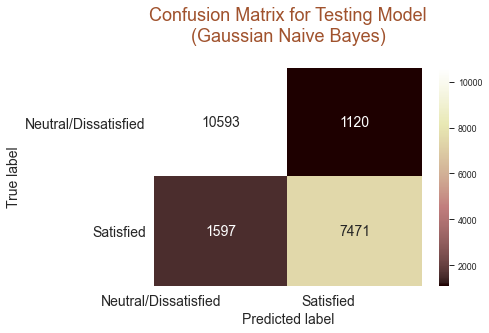

In [39]:
# Form Confusion Matrix as a DataFrame
confusion_matrix_gnb = pd.DataFrame((confusion_matrix(y_test, y_test_pred_gnb)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# Plot Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_gnb, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gaussian Naive Bayes)\n', fontsize=18, color='sienna')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### 3. ***K-Nearest Neighbor Classifier***

###### - ***Train the Model***

In [89]:
from sklearn.neighbors import KNeighborsClassifier

# Train the Model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


###### - ***Predict Data Train and Data Test***

In [90]:
# Predict Data Train
y_train_pred_knn = knn_model.predict(X_train)

# Print Classification Report
print('Classification Report Training Model (K-Neighbors Classifier):')
print(classification_report(y_train, y_train_pred_knn))

Classification Report Training Model (K-Neighbors Classifier):
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     47166
           1       0.84      0.78      0.81     35957

    accuracy                           0.84     83123
   macro avg       0.84      0.83      0.84     83123
weighted avg       0.84      0.84      0.84     83123



In [91]:
# Predict Data Test
y_test_pred_knn = knn_model.predict(X_test)

# Print Classification Report
print('Classification Report Testing Model (K-Neighbors Classifier):')
print(classification_report(y_test, y_test_pred_knn))

Classification Report Testing Model (K-Neighbors Classifier):
              precision    recall  f1-score   support

           0       0.77      0.82      0.80     11713
           1       0.75      0.68      0.72      9068

    accuracy                           0.76     20781
   macro avg       0.76      0.75      0.76     20781
weighted avg       0.76      0.76      0.76     20781



In [65]:
roc_auc_knn = roc_auc_score(y_test, y_test_pred_knn)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.7533398348932797


###### - ***Confusion Matrix***

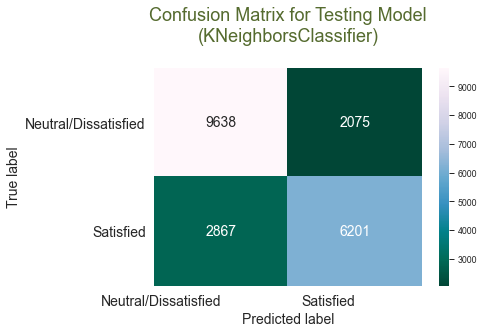

In [43]:
# Form Confusion Matrix as a DataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# Plot Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='PuBuGn_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(KNeighborsClassifier)\n', fontsize=18, color='darkolivegreen')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

##### 4. ***Decision Tree Classifier* (Model Terpilih ✓)**

Model `decision tree` menjadi model terpilih karena model ini menghasilkan nilai presisi tertinggi kedua setelah model `random forest` dan dapat memberikan interpretasi yang insightful. 

Mengapa kami tidak memilih model `random forest` ? alasannya, karena model ini menghasilkan `tree` yang sangat kompleks sehingga sulit untuk diiinterpretasikan, sedangkan perbedaan nilai presisi yang dihasilkan pun  tidak memiliki selisih yang signifikan.

###### - ***Tuning Hyperparameter***

In [66]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
param_grid = {'max_depth' : np.arange(3,10),
              'min_samples_split' : np.arange(2,10),
              'min_samples_leaf' : np.arange(1,10)}

# Create a Randomized Search CV object
dt = DecisionTreeClassifier()
random_grid_dt = RandomizedSearchCV(
    estimator = dt,
    param_distributions = param_grid,
    scoring = 'roc_auc',
    random_state=0,
    cv = 10)
print(random_grid_dt)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=0, scoring='roc_auc')


In [68]:
random_grid_dt.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=0, scoring='roc_auc')

In [69]:
random_grid_dt.best_params_

{'min_samples_split': 6, 'min_samples_leaf': 6, 'max_depth': 9}

In [70]:
random_grid_dt.best_score_

0.9855872943861514

###### - ***Train the Model***

In [71]:
# Train the Model
dt_model = DecisionTreeClassifier(max_depth=9,min_samples_leaf=6,min_samples_split=6).fit(X_train,y_train)
print(dt_model)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=6)


###### - ***Predict Data Train and Test***

In [72]:
# Predict Data Train
y_train_pred_dt = dt_model.predict(X_train)

# Print Classification Report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     47166
           1       0.95      0.92      0.93     35957

    accuracy                           0.94     83123
   macro avg       0.94      0.94      0.94     83123
weighted avg       0.94      0.94      0.94     83123



In [73]:
# Predict Data Test
y_test_pred_dt = dt_model.predict(X_test)

from sklearn.metrics import confusion_matrix, classification_report
# Print Classification Report
print('Classification Report Testing Model (Decision Tree Classifier):')
print(classification_report(y_test, y_test_pred_dt))

Classification Report Testing Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     11713
           1       0.94      0.92      0.93      9068

    accuracy                           0.94     20781
   macro avg       0.94      0.94      0.94     20781
weighted avg       0.94      0.94      0.94     20781



Karena precision dari prediksi `data test` dan `data train` memiliki nilai yang sama, yaitu sebesar **0.94** maka dapat dikatakan bahwa model sudah sangat baik dan tidak terjadi *underfitting* maupun *overfitting*.

In [74]:
roc_auc_dt = roc_auc_score(y_test, y_test_pred_dt)
print('ROC AUC:', roc_auc_dt)

ROC AUC: 0.9368181821434273


###### - ***Confusion Matrix***

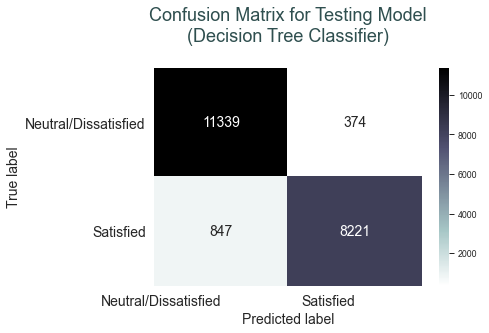

In [52]:
# Form Confusion Matrix as a DataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# Plot Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='bone_r')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='darkslategrey')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

Keterangan:
- 11212 True Positive (ketika memprediksi neutral/dissatisfied, dan benar)
- 8310 True Negative (ketika memprediksi satisfied, dan benar)
- 758 False Positive (ketika memprediksi neutral/dissatisfied, dan salah)
- 501 False Negative (ketika memprediksi satisfied, dan salah)

###### - ***Decision Tree Graph***

**I run graphviz on google colab, because i can't run it on jupyter notebook.**

In [53]:
!pip install graphviz

In [54]:
import graphviz

# DOT Data
feature_cols= ["Gender", "Customer Type","Age", "Type of Travel", "Class", 
               "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", 
               "Ease of Online booking", "Gate location", "Food and drink", "Online",
               "Seat comfort","Inflight entertainment","On-board service",
               "Leg room service","Baggage handling","Checkin service",
               "Inflight service","Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]
dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names = feature_cols, class_names = ['Neutral/Dissatisfied', 'Satisfied'],
                                filled=True)

# Draw Graph
graph = graphviz.Source(dot_data, format="png") 
graph

ExecutableNotFound: failed to execute ['dot', '-Kdot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [55]:
# Save Image
import pylab
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
import pydotplus

dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['Neutral/Dissatisfied', 'Satisfied'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('dtgraph.png')

ModuleNotFoundError: No module named 'sklearn.externals.six'

###### - ***Feature Importances***

In [ ]:
# Feature Importance Plot
importances_dt = pd.Series(data=dt_model.feature_importances_,
                        index= X_train.columns)
importances_dt = importances_dt.sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(8,8))
importances_dt.plot(kind='barh', cmap='Set2')
plt.title('Features Importance Plot')
plt.show()

##### 5. ***Random Forest Classifier***

###### - ***Train the Model***

In [75]:
from sklearn.ensemble import RandomForestClassifier

# Train the Model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)

RandomForestClassifier()


###### - ***Predict Data Train and Test***

In [76]:
# Predict Data Train
y_train_pred_dt = rf_model.predict(X_train)

# Print Classification Report
print('Classification Report Training Model (Decision Tree Classifier):')
print(classification_report(y_train, y_train_pred_dt))

Classification Report Training Model (Decision Tree Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47166
           1       1.00      1.00      1.00     35957

    accuracy                           1.00     83123
   macro avg       1.00      1.00      1.00     83123
weighted avg       1.00      1.00      1.00     83123



In [77]:
# Predict Data Test
y_test_pred_rf = rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
# Print Classification Report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred_rf))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     11713
           1       0.97      0.94      0.96      9068

    accuracy                           0.96     20781
   macro avg       0.96      0.96      0.96     20781
weighted avg       0.96      0.96      0.96     20781



Karena precision dari prediksi `data train` = **1** dan `data test` memiliki nilai yang tidak jauh berbeda, yaitu sebesar **0.96** maka dapat dikatakan bahwa model sudah cukup baik dan tidak terjadi *underfitting* maupun *overfitting*.

In [78]:
roc_auc_rf = roc_auc_score(y_test, y_test_pred_rf)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9601329055357981


###### - ***Confusion Matrix***

In [ ]:
# Form Confusion Matrix as a DataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('Neutral/Dissatisfied', 'Satisfied'), ('Neutral/Dissatisfied', 'Satisfied'))

# Plot Confusion Matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='OrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='firebrick')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

###### - ***Random Forest Graph***

In [ ]:
import graphviz
from sklearn import tree

# DOT Data
feature_cols= ["Gender", "Customer Type","Age", "Type of Travel", "Class", 
               "Flight Distance", "Inflight wifi service", "Departure/Arrival time convenient", 	
               "Ease of Online booking", 	"Gate location", 	"Food and drink", "Online",
               "Seat comfort","Inflight entertainment","On-board service",
               "Leg room service","Baggage handling","Checkin service",
               "Inflight service","Cleanliness","Departure Delay in Minutes","Arrival Delay in Minutes"]
dot_data_rf = tree.export_graphviz(rf_model.estimators_[0], out_file=None, feature_names = feature_cols, class_names = ['Neutral/Dissatisfied', 'Satisfied'],
                                filled=True)

# Draw Graph
graph_rf = graphviz.Source(dot_data_rf, format="png") 
graph_rf

Dapat dilihat bahwa hasil tree dari model `random forest` sangatlah kompleks sehingga sulit untuk diinterpretasikan.

###### - ***Feature Importances***

In [ ]:
# Varible Importance
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train,y_train)
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the Feature Ranking
print("Feature ranking:")
for f in range(x.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the Feature Importances of the Forest
plt.figure(figsize=(16,8))
plt.title("Feature importances")
plt.bar(range(x.shape[1]), importances[indices],color="pink", yerr=std[indices],align="center")
plt.xticks(range(x.shape[1]), indices)
plt.xlim([-1, x.shape[1]])
plt.show()

### Model Comparison

- Jika dilihat berdasarkan *accuracy*, adalah:

| Algorithm | Training Data Accuracy | Testing Data Accuracy |
| ------ |------|------|
| Logistic Regression | 0.81 | 0.81 |
| Gaussian Naive Bayes | 0.87 | 0.87 |
| K-Neighbors Classifier | 0.84 | 0.76 |
| Decision Tree Classifier | 0.94 | 0.94 |
| Random Forest Classifier | 1.00 | 0.96 |

- Jika dilihat berdasarkan skor roc, adalah:

In [80]:
auc_scores = [roc_auc_log, roc_auc_gnb, roc_auc_knn, roc_auc_dt, roc_auc_rf]
model_scores = pd.DataFrame(auc_scores, index=['Logistic Regression','Gaussian Naive Bayes','K-Neighbors','Decision Tree', 'Random Forest'], columns=['AUC'])
model_scores.head()

,AUC
Logistic Regression,0.810176
Gaussian Naive Bayes,0.864133
K-Neightbors,0.753340
Decision Tree,0.936818
Random Forest,0.960133


### Conclusion

Jika dilihat berdasarkan akurasi dan skor AUC, maka model  `Random Forest ` lebih unggul daripada model lainnya. Namun, karena model ini menghasilkan `tree` yang sangat kompleks sehingga sulit untuk diiinterpretasikan sehingga kami memilih untuk menggunakan model `Decision Tree `. Hal ini dikarenakan perbedaan nilai yang dihasilkan tidak memiliki selisih yang signifikan, dan dapat memberikan interpretasi yang insightful.